In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3次元グラフをかくときに使います。
from matplotlib import cm

In [2]:
from numpy import exp, sqrt, pi 
from numpy.linalg import eig, inv 

In [3]:
from scipy.stats import multivariate_normal

In [4]:
x1 = np.array([0,0])
x2 = np.array([0.3,0.3])
x3 = np.array([0.6,0.6])
x4 = np.array([0.9,0.9])

In [5]:
Z = np.eye(3)
X = np.eye(3)
Y = np.eye(3)
def prepare_2d_space(f):
    # global変数Zの初期化
    global Z
    global X
    global Y
    N = 100 # データ点数
    x = y = np.linspace(0,1,N+1)
    X, Y = np.meshgrid(x, y)
    Z = np.dstack((X,Y))    
    def wapper(Z,*args,**kwargs):
        func_2d_density = f(Z,*args,**kwargs)
        return func_2d_density
    return wapper

In [6]:
def state_function(coordinates): # デコレータの引数にprefixをとりたい
    def base_func(base_function): # 引数付きデコレータが返す、引数なしデコレータ
        def wrapper(coordinates): # 引数なしデコレータが返す、ラッパ関数
            density_function = []
            for coordinate in coordinates:
                z = base_function(coordinate)
                density_function.append(z)
            density_function = np.array(density_function)
            density_function = density_function.max(axis = 0)
            return density_function
        return wrapper
    return base_func

In [7]:
# coodinates初期化
# 使いたい関数を下の3行でデコレートする
# 使いたい関数の引数には原子座標"だけ"をとるようにする
is_Z = True
coordinates = np.eye(3)
@state_function(coordinates)
@prepare_2d_space
def gaussian_2d(coordinate):
    sigma = np.array([[0.1,0],
                 [0.1,1]])
    return multivariate_normal.pdf(Z, coordinate[0:2], sigma) + coordinate[2]

In [8]:
def square(Z,coordinate,A,B):
    return A - B*((Z[:,:,0]-coordinate[0])**2 + (Z[:,:,1]-coordinate[1])**2) + coordinate[2]

In [9]:
# coodinates初期化
# 使いたい関数を下の3行でデコレートする
# 使いたい関数の引数には原子座標"だけ"をとるようにする
coordinates = np.eye(3)
@state_function(coordinates)
@prepare_2d_space
def square_2d(coordinate):
    A = 0.5
    B = 1
    return square(Z,coordinate,A,B)

In [10]:
x1 = np.array([0,0,0.2])
x2 = np.array([1,1,0.5])

In [11]:
coordinates = [x1,x2,]
density_function = gaussian_2d(coordinates)

In [12]:
coordinates = [x1,x2]
density_function = square_2d(coordinates)

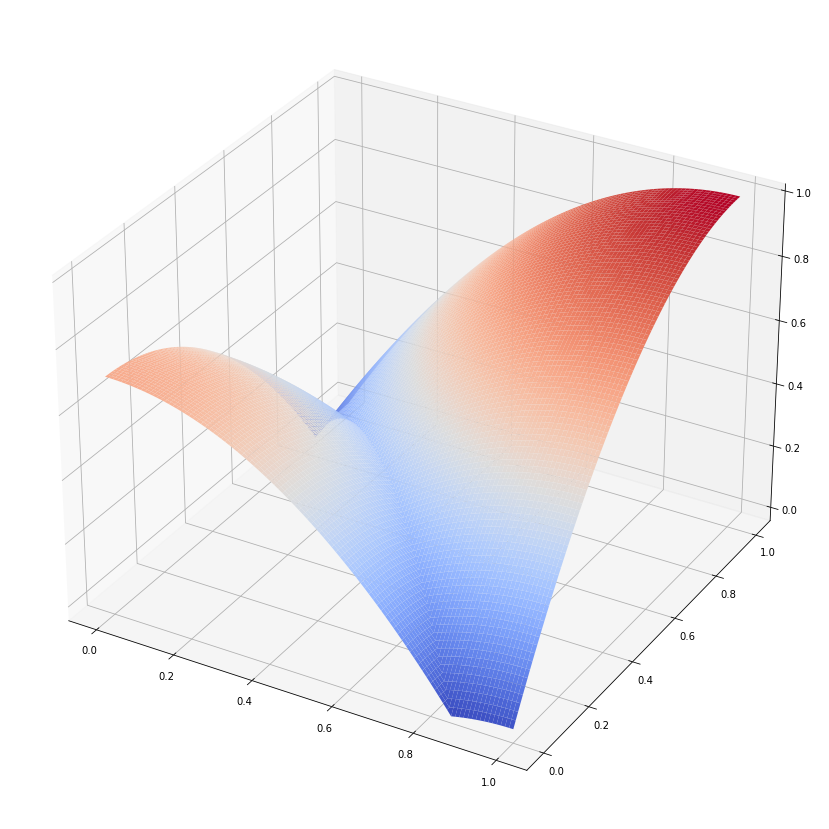

In [13]:
#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, density_function, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

In [46]:
def transform(x, y, A):
    shape_x = x.shape
    shape_y = y.shape
    P = np.stack((x.reshape(-1), y.reshape(-1)), axis=-1)
    P = P.T
    Q = A @ P
    return Q[0].reshape(shape_x), Q[1].reshape(shape_y)

A = np.array([[2, 1], [1, 3]])

In [47]:
X_dash, Y_dash = transform(X,Y,A)

In [20]:
Z_dash = np.dstack((X_dash.reshape(-1), Y_dash.reshape(-1)), axis=-1)

In [23]:
coordinates = [x1,x2]
Z_dash = square_2d(coordinates)

In [34]:
Z_dash = np.hstack((X_dash,Y_dash))

In [33]:
X_dash.shape

(10201,)

In [37]:
X_dash

array([0.  , 0.02, 0.04, ..., 2.96, 2.98, 3.  ])

In [32]:
Z_dash.shape

(1, 10201, 2)

In [43]:
X.shape

(101, 101)

In [42]:
X.reshape(-1).shape

(10201,)

In [48]:
Z_dash = X_dash + Y_dash

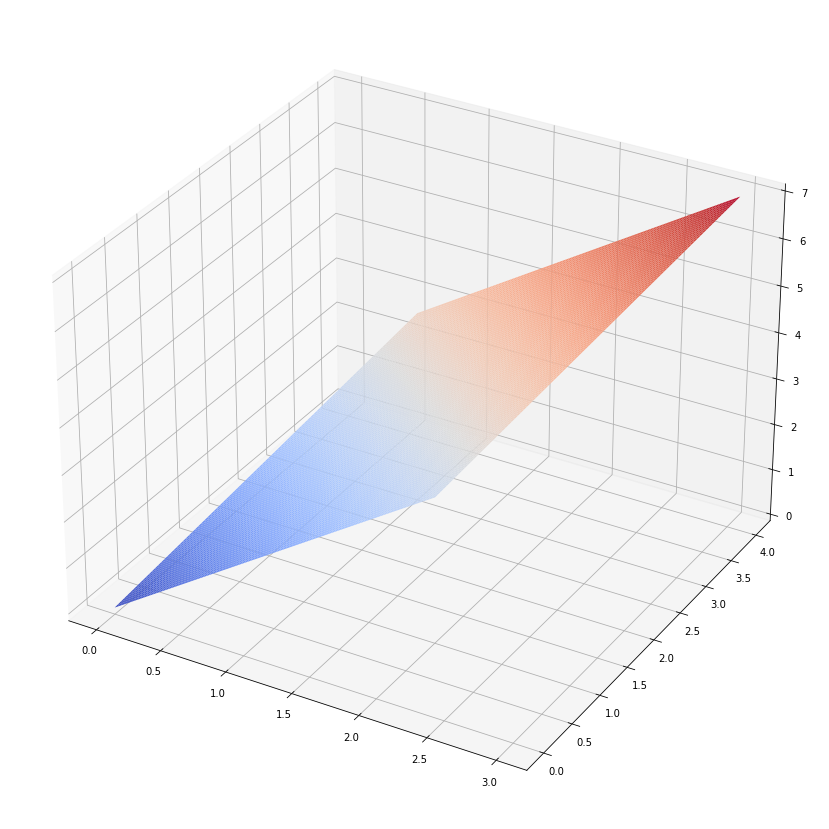

In [49]:
#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_dash, Y_dash, Z_dash, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

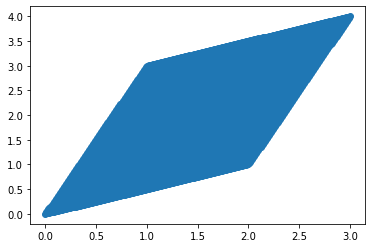

In [22]:
plt.scatter(X_dash, Y_dash)